In [19]:
#importung libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
#reading the dataset
data= pd.read_csv('expenses.csv')

In [21]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [22]:
#checking for null values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [23]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [24]:
df=data

In [25]:
#Encoding- converting categorical variables into numeric using label encoder
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df['region'] = label_encoder.fit_transform(df['region'])

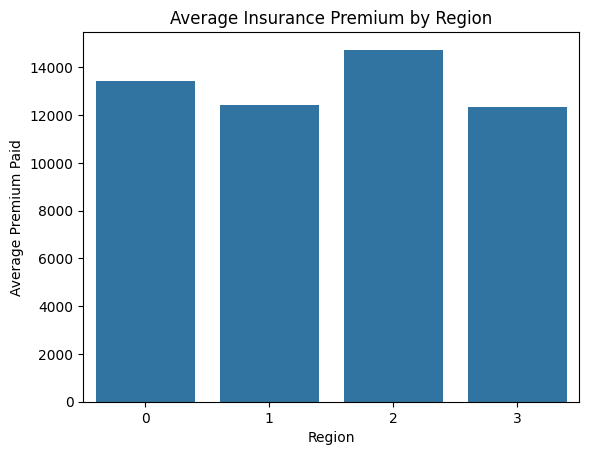

In [26]:
# Average insurance premium paid in different regions
avg_premiums = df.groupby('region')['charges'].mean().reset_index()
sns.barplot(x = 'region', y = 'charges', data = avg_premiums)
plt.title('Average Insurance Premium by Region')
plt.xlabel('Region')
plt.ylabel('Average Premium Paid')
plt.show()


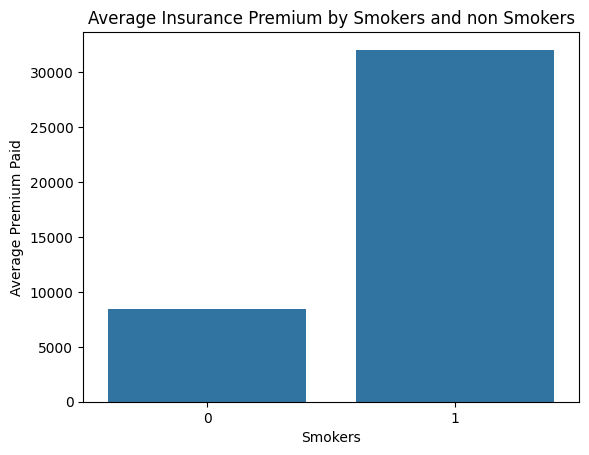

In [27]:
#Average insurance paid by smokers and non smokers
avg_smoker= data.groupby('smoker')['charges'].mean().reset_index()
sns.barplot(x = 'smoker', y = 'charges', data = avg_smoker)
plt.title('Average Insurance Premium by Smokers and non Smokers')
plt.xlabel('Smokers')
plt.ylabel('Average Premium Paid')
plt.show()

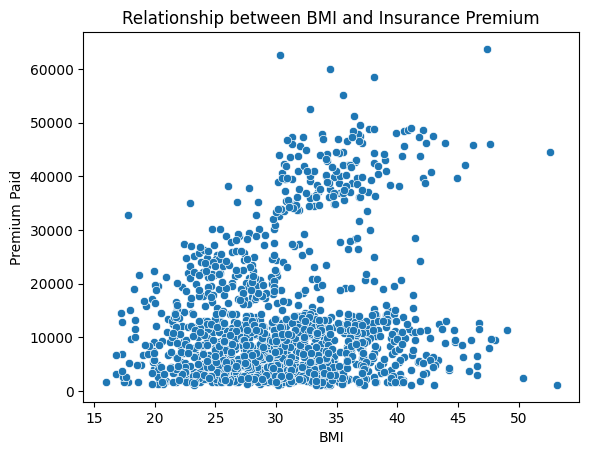

In [28]:
#relationship between bmi and premium paid
sns.scatterplot(x = 'bmi', y = 'charges', data = df)
plt.title('Relationship between BMI and Insurance Premium')
plt.xlabel('BMI')
plt.ylabel('Premium Paid')

plt.show()

In [30]:
#creating correlation matrix
matrix=df.corr()
matrix

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


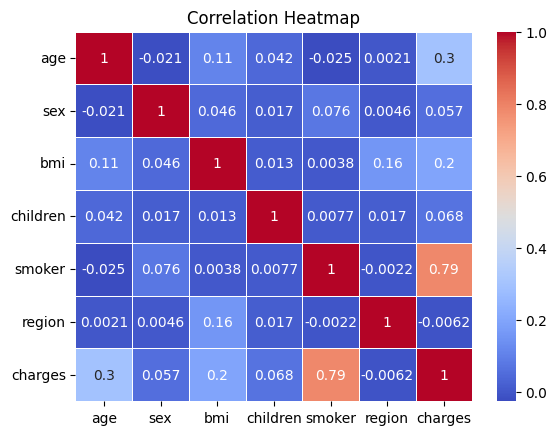

In [31]:
#heatmap for correlation matrix
sns.heatmap(matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [32]:
df['bmi'].max()

53.13

In [33]:
#Grouping bmi into 15-20 21-25 26-30 31-35 and so on

def group_bmi(bmi):
  if 15 <= bmi < 21:
    return '15-20'
  elif 21 <= bmi < 26:
    return '21-25'
  elif 26 <= bmi < 31:
    return '26-30'
  elif 31 <= bmi < 36:
    return '31-35'
  elif 36 <= bmi < 41:
    return '36-40'
  elif 41 <= bmi < 46:
    return '41-45'
  elif 46 <= bmi < 51:
    return '46-50'
  else:
    return '50+'


df['bmi_group'] = df['bmi'].apply(group_bmi)
df['bmi_group']

0       26-30
1       31-35
2       31-35
3       21-25
4       26-30
        ...  
1333    26-30
1334    31-35
1335    36-40
1336    21-25
1337    26-30
Name: bmi_group, Length: 1338, dtype: object

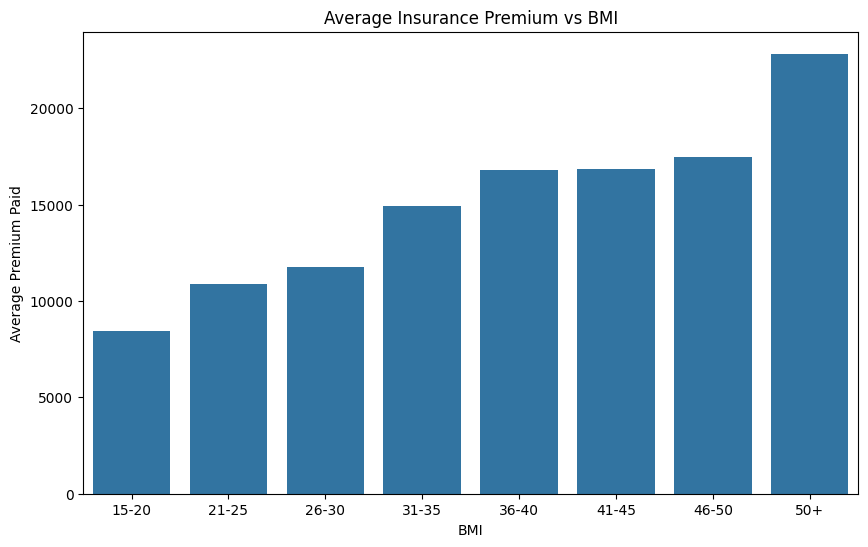

In [14]:
#permium paid by different bmi groups
avg_premiums = df.groupby('bmi_group')['charges'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='bmi_group', y='charges', data=avg_premiums)
plt.title('Average Insurance Premium vs BMI')
plt.xlabel('BMI')
plt.ylabel('Average Premium Paid')

plt.show()

In [34]:
df

,age,sex,bmi,children,smoker,region,charges,bmi_group
0,19,0,27.900,0,1,3,16884.92400,26-30
1,18,1,33.770,1,0,2,1725.55230,31-35
2,28,1,33.000,3,0,2,4449.46200,31-35
3,33,1,22.705,0,0,1,21984.47061,21-25
4,32,1,28.880,0,0,1,3866.85520,26-30
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,26-30
1334,18,0,31.920,0,0,0,2205.98080,31-35
1335,18,0,36.850,0,0,2,1629.83350,36-40
1336,21,0,25.800,0,0,3,2007.94500,21-25


In [41]:
# splitting into dependent and independent variables
x= df.drop(['charges','bmi_group'],axis=1)
y=df['charges']

In [42]:
x.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [43]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [44]:
#train test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [45]:
#applying linear regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()


model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [47]:
#accuracy metric
from sklearn.metrics import r2_score, mean_absolute_error
print('R2 score for Linear regression:',r2_score(y_test, y_pred))
print('MAE for Linear regression:',mean_absolute_error(y_test, y_pred))

0.7833463107364539
4186.508898366433


In [48]:
#applying Ridge
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1)
ridge.fit(x_train, y_train)

y_pred_ridge = ridge.predict(x_test)

print("R2 score for Ridge Regression:", r2_score(y_test, y_pred_ridge))
print("MAE for Ridge Regression:", mean_absolute_error(y_test, y_pred_ridge))


R2 score for Ridge Regression: 0.7833217621706015
MAE for Ridge Regression: 4187.673855281296


In [49]:
#decision tree
from sklearn.tree import DecisionTreeRegressor
model_d = DecisionTreeRegressor()
model_d.fit(x_train, y_train)

DecisionTreeRegressor()

In [50]:
y_pred_d = model_d.predict(x_test)
print("R2  for decision tree",r2_score(y_test, y_pred_d))
print("MAE value for decision tree",mean_absolute_error(y_test, y_pred_d))


R2  for decision tree 0.7263949967510172
MAE value for decision tree 3011.3033168880597


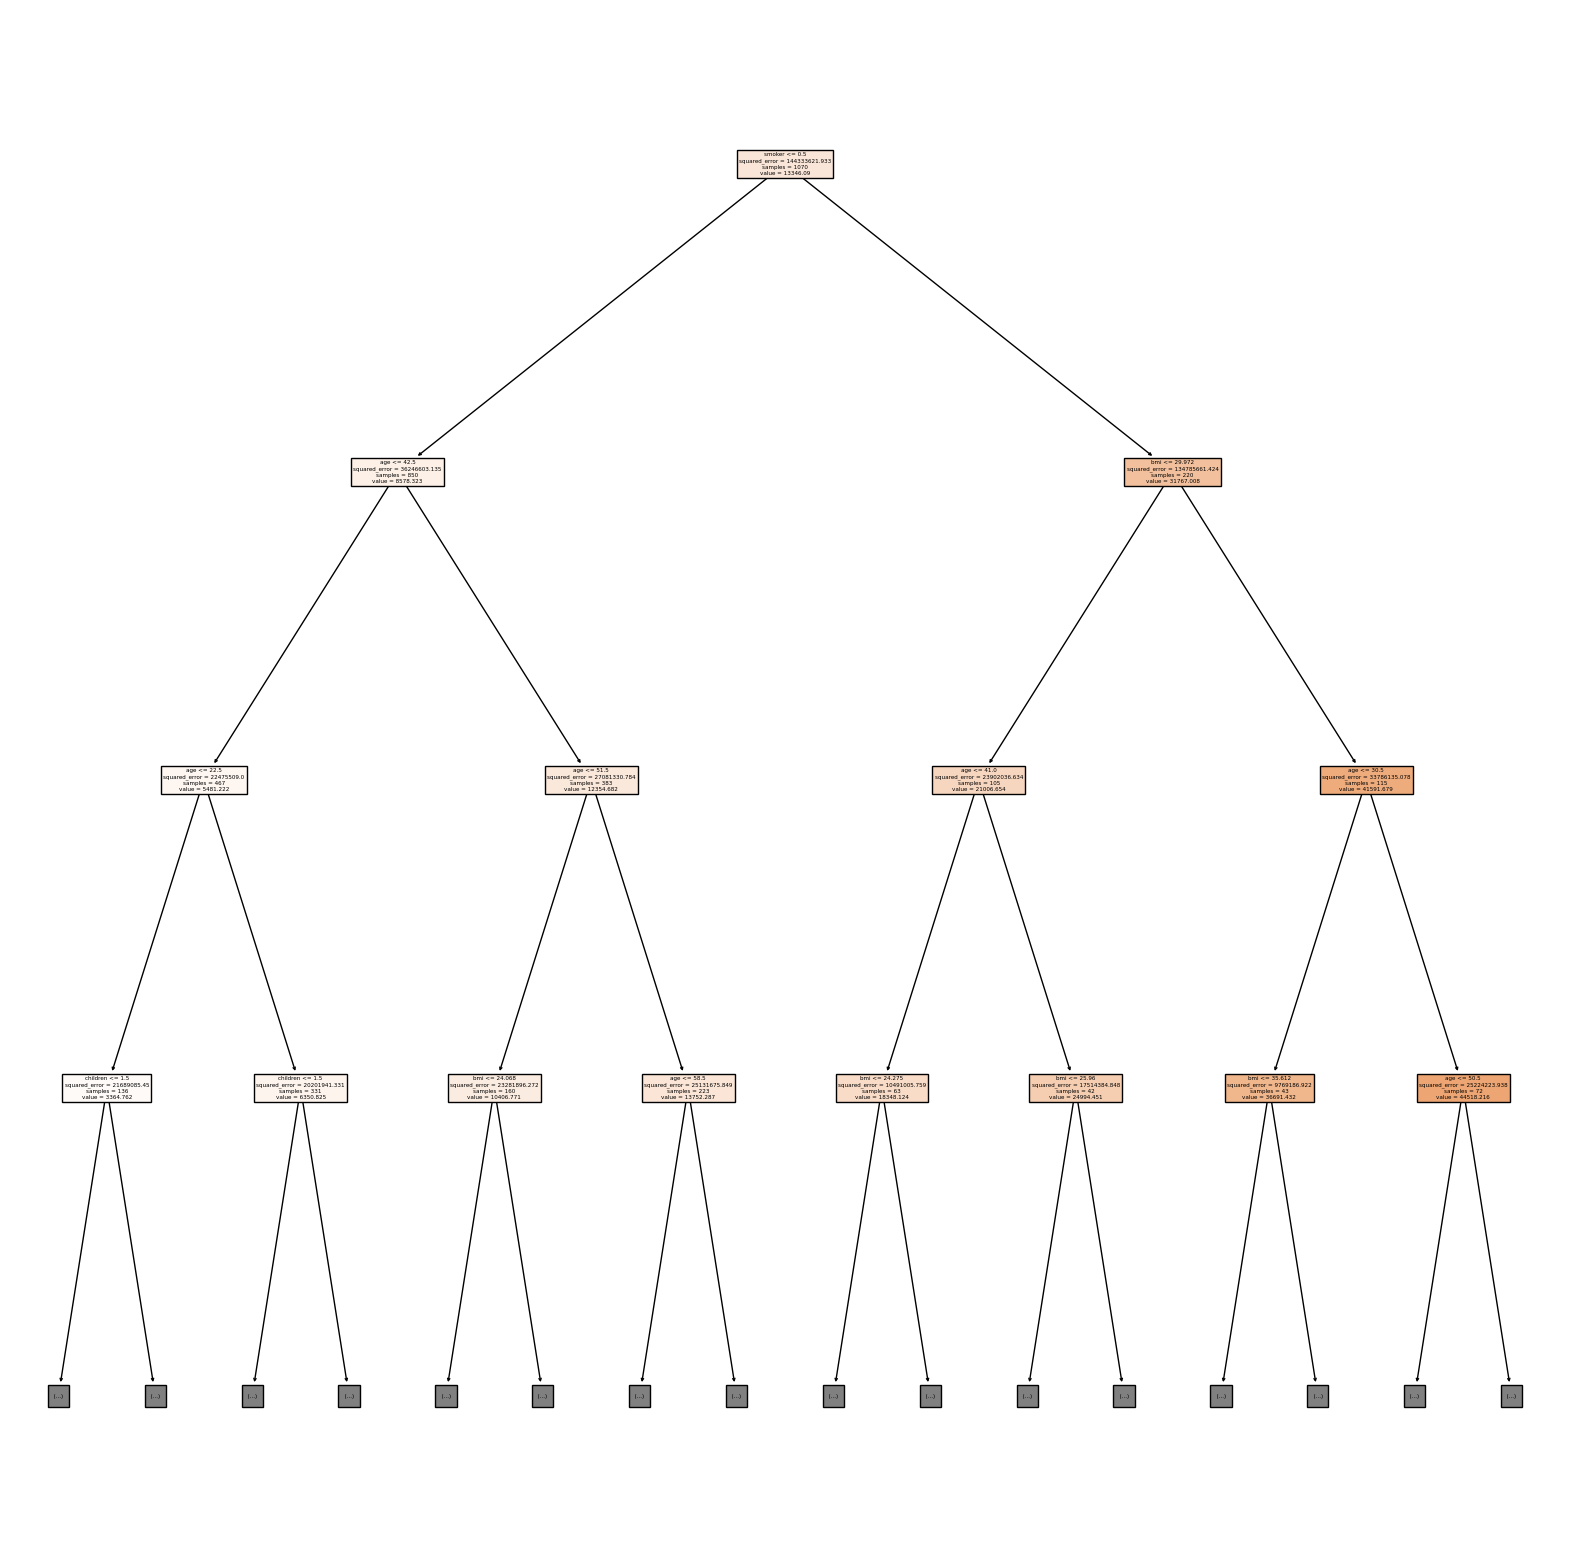

In [51]:
#displaying decision tree
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(20,20))
tree.plot_tree(model_d, max_depth= 3, feature_names=x.columns, filled=True)
plt.show()


In [52]:
#applying Random Forest regressor
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(x_train, y_train)

y_pred_rf = model_rf.predict(x_test)

print("R2  for Random Forest Regression:", r2_score(y_test, y_pred_rf))
print("MAE for Random Forest Regression:", mean_absolute_error(y_test, y_pred_rf))


R2  for Random Forest Regression: 0.8642606273649586
MAE for Random Forest Regression: 2533.674643617756


In [53]:
import xgboost as xgb

model_xgb = xgb.XGBRegressor(n_estimators=100, random_state=42)
model_xgb.fit(x_train, y_train)

y_pred_xgb = model_xgb.predict(x_test)

print("R2 score for XGBoost Regression:", r2_score(y_test, y_pred_xgb))
print("MAE for XGBoost Regression:", mean_absolute_error(y_test, y_pred_xgb))


R2 score for XGBoost Regression: 0.8501678977480663
MAE for XGBoost Regression: 2791.8325179517183


In [54]:
#some more visulatization
df1= data
df1.head()

,age,sex,bmi,children,smoker,region,charges,bmi_group
0,19,0,27.900,0,1,3,16884.92400,26-30
1,18,1,33.770,1,0,2,1725.55230,31-35
2,28,1,33.000,3,0,2,4449.46200,31-35
3,33,1,22.705,0,0,1,21984.47061,21-25
4,32,1,28.880,0,0,1,3866.85520,26-30


In [55]:
import pandas as pd
import numpy as np
bins = [0, 18, 35, 50, 65, np.inf]
labels = ['0-18', '19-35', '36-50', '51-65', '65+']
df1['age_group'] = pd.cut(df1['age'], bins, labels=labels)
df1.head()


,age,sex,bmi,children,smoker,region,charges,bmi_group,age_group
0,19,0,27.900,0,1,3,16884.92400,26-30,19-35
1,18,1,33.770,1,0,2,1725.55230,31-35,0-18
2,28,1,33.000,3,0,2,4449.46200,31-35,19-35
3,33,1,22.705,0,0,1,21984.47061,21-25,19-35
4,32,1,28.880,0,0,1,3866.85520,26-30,19-35


<ipython-input-56-54604dc40323>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age_group', y='charges', data=avg_charges, palette='viridis')


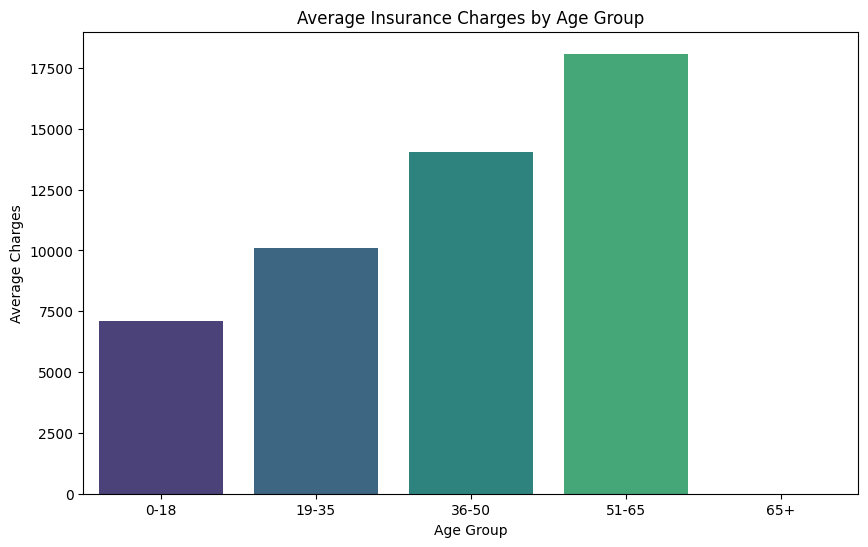

In [56]:
avg_charges = df1.groupby('age_group')['charges'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='charges', data=avg_charges, palette='viridis')

plt.title('Average Insurance Charges by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Charges')
plt.show()

<ipython-input-57-7ff838e61505>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='age_group', y='charges', hue='smoker', data=df1, ci=None)


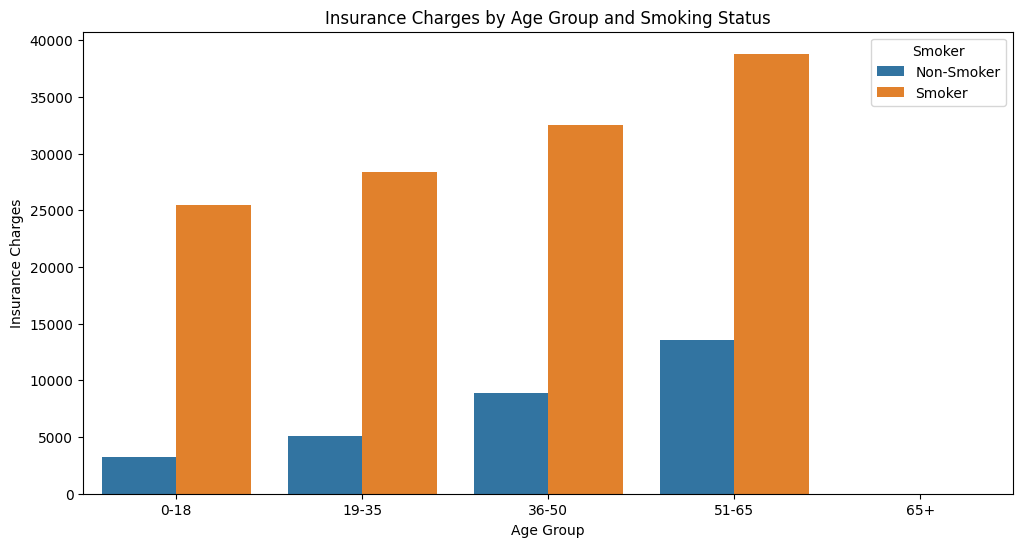

In [57]:
plt.figure(figsize=(12, 6))
sns.barplot(x='age_group', y='charges', hue='smoker', data=df1, ci=None)

plt.title('Insurance Charges by Age Group and Smoking Status')
plt.xlabel('Age Group')
plt.ylabel('Insurance Charges')
plt.legend(title='Smoker', labels=['Non-Smoker', 'Smoker'])
plt.show()